In [61]:
! pip install citipy

import pandas as pd
import numpy as np
import json
import requests
import matplotlib
from citipy import citipy
import csv
import seaborn as sns
from matplotlib import pyplot as plt

In [32]:
api_key = "b9328052fa7a9b2d7478d822dabeb6d1"



In [63]:
city_df= pd.read_csv('worldcitiespop.csv', sep=',', encoding='latin-1')
city_df.head(40)
randomcity_df=city_df.take(np.random.permutation(len(city_df))[:500])
randomcity_df.head(10)

randomcity_df["Temperature"] = ""
randomcity_df["Humidity"] = ""
randomcity_df["Cloudiness"] = ""
randomcity_df["WindSpeed"] = ""
randomcity_df.head(500)


/Userjaymandavia/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Userjaymandavia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Userjaymandavia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Userjaymandavia/anaconda/

,Country,City,AccentCity,Region,Population,Latitude,Longitude,Temperature,Humidity,Cloudiness,WindSpeed
895072,et,konda,Konda,46,NaN,10.850000,39.050000,,,,
543619,cn,nanchangtsun,Nanchangtsun,24,NaN,35.406111,110.710000,,,,
442368,cn,chingshuihuitsutzuchihchen,Chingshuihuitsutzuchihchen,15,NaN,34.748056,106.126944,,,,
558878,cn,qiaoqing,Qiaoqing,30,NaN,22.337142,112.804867,,,,
678040,co,nemosten,Nemostén,33,NaN,4.803532,-73.728036,,,,
404955,cl,achuelo,Achuelo,16,NaN,-18.566667,-69.800000,,,,
873465,es,malzaga,Málzaga,59,NaN,43.183333,-2.433333,,,,
789744,de,westrup,Westrup,6,NaN,52.233333,8.016667,,,,
491355,cn,hsuyunghsien,Hsüyunghsien,32,NaN,28.169918,105.434521,,,,
537385,cn,masiping,Masiping,11,NaN,26.745278,111.810000,,,,


In [64]:
for index, row in randomcity_df.iterrows():
    lat = row["Latitude"]
    lng = row["Longitude"]
    
    target_url = "http://api.openweathermap.org/data/2.5/weather?lat={}&lon={}&units=IMPERIAL&mode=json&APPID={}".format(lat, lng,api_key)
    name_address = requests.get(target_url).json()
    print(target_url)
    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point.
    try:
        randomcity_df.set_value(index, "Temperature", name_address["main"]["temp"])
        randomcity_df.set_value(index, "Humidity", name_address["main"]["humidity"])
        randomcity_df.set_value(index, "Cloudiness", name_address["clouds"]["all"])
        randomcity_df.set_value(index, "WindSpeed", name_address["wind"]["speed"])
        print("--", end="")
    except:
        print(" Missing field... skipping.")
randomcity_df.head()


http://api.openweathermap.org/data/2.5/weather?lat=10.85&lon=39.05&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=35.406110999999996&lon=110.71&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=34.748056&lon=106.126944&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=22.337142&lon=112.80486699999999&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=4.803532&lon=-73.728036&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=-18.566667000000002&lon=-69.8&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=43.183333000000005&lon=-2.433333&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822d

--http://api.openweathermap.org/data/2.5/weather?lat=53.766667000000005&lon=10.933333&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=-16.55&lon=-68.6166667&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=41.2875&lon=19.840555600000002&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=-17.283333300000002&lon=-68.7&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=32.309796&lon=67.203239&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=47.85&lon=11.583333&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=6.116666700000001&lon=15.55&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822d

--http://api.openweathermap.org/data/2.5/weather?lat=44.333333&lon=124.816667&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=30.608679&lon=120.98285700000001&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=-28.566667&lon=-52.75&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=49.130278000000004&lon=9.670278&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=10.433333300000001&lon=-0.65&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=33.385834&lon=69.72166700000001&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=59.1138889&lon=26.34&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478

--http://api.openweathermap.org/data/2.5/weather?lat=6.875406&lon=-5.867911&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=43.389444399999995&lon=18.7691667&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=39.018055600000004&lon=21.555&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=43.033333&lon=126.4&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=34.378082&lon=66.686111&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=5.85&lon=-2.0166667&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=50.6&lon=3.916667&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api

--http://api.openweathermap.org/data/2.5/weather?lat=43.588091&lon=6.303046&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=40.190214000000005&lon=48.14561&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=11.733333&lon=38.466667&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=31.203611100000003&lon=30.0375&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=40.460278&lon=46.389444&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=47.812607&lon=6.017576&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=31.694529&lon=112.161624&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1

--http://api.openweathermap.org/data/2.5/weather?lat=47.578338&lon=8.981200999999999&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=50.666667&lon=4.133333&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=28.922889&lon=114.67148799999998&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=60.45&lon=22.033333&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=48.866667&lon=8.55&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=53.716667&lon=12.266667&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=42.797863&lon=-4.0112&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http:/

--http://api.openweathermap.org/data/2.5/weather?lat=-8.744824000000001&lon=20.983435999999998&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=48.879632&lon=6.843901&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=34.503757&lon=65.422563&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=-12.3&lon=15.483332999999998&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=33.361111&lon=117.134722&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=-4.0627778&lon=-78.95222220000001&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=9.776055&lon=-83.959296&units=IMPERIAL&mode=json&APPID=b9328052fa7a9

--http://api.openweathermap.org/data/2.5/weather?lat=32.256111&lon=117.607222&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=5.75&lon=10.733333300000002&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=46.6575&lon=13.023333000000001&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=44.7455556&lon=17.7180556&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=-0.75&lon=-50.966667&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=39.8825&lon=48.298056&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=48.278861&lon=2.238268&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--htt

--http://api.openweathermap.org/data/2.5/weather?lat=41.430833299999996&lon=20.4555556&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=-18.2333333&lon=-63.85&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=28.6&lon=97.3&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=32.908212&lon=69.256715&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=50.25&lon=10.083333&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=49.166667&lon=1.676623&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweathermap.org/data/2.5/weather?lat=49.0638&lon=17.053645&units=IMPERIAL&mode=json&APPID=b9328052fa7a9b2d7478d822dabeb6d1
--http://api.openweat

,Country,City,AccentCity,Region,Population,Latitude,Longitude,Temperature,Humidity,Cloudiness,WindSpeed
895072,et,konda,Konda,46,NaN,10.850000,39.050000,39.59,70,0,3.38
543619,cn,nanchangtsun,Nanchangtsun,24,NaN,35.406111,110.710000,37.66,76,0,3.94
442368,cn,chingshuihuitsutzuchihchen,Chingshuihuitsutzuchihchen,15,NaN,34.748056,106.126944,28.43,69,56,3.71
558878,cn,qiaoqing,Qiaoqing,30,NaN,22.337142,112.804867,66.59,67,48,12.77
678040,co,nemosten,Nemostén,33,NaN,4.803532,-73.728036,51.8,81,20,4.7


In [98]:
randomcity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 895072 to 698420
Data columns (total 11 columns):
Country        500 non-null object
City           500 non-null object
AccentCity     500 non-null object
Region         500 non-null object
Population     7 non-null float64
Latitude       500 non-null float64
Longitude      500 non-null float64
Temperature    500 non-null object
Humidity       500 non-null object
Cloudiness     500 non-null object
WindSpeed      500 non-null object
dtypes: float64(3), object(8)
memory usage: 66.9+ KB


In [100]:
sns.lmplot(x= 'Latitude', y= 'Temperature', data=randomcity_df, fit_reg=False, hue='Country')
plt.savefig("Lat_Temp.png")

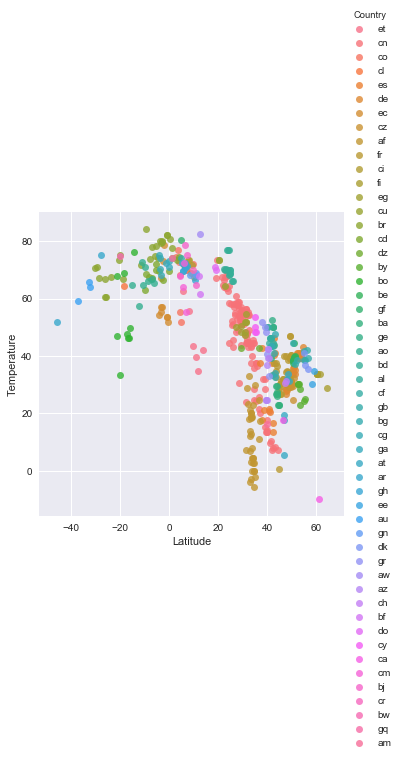

In [101]:
plt.show()

In [91]:
sns.lmplot(x= 'Latitude', y= 'Humidity', data=randomcity_df, fit_reg=False)
plt.savefig("Lat_Hum.png")


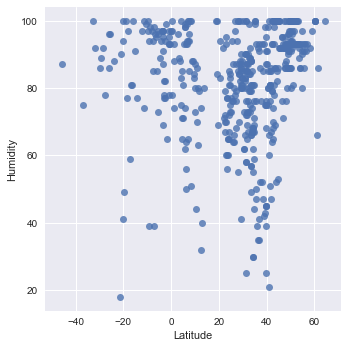

In [92]:
plt.show()

In [93]:
sns.lmplot(x= 'Latitude', y= 'Cloudiness', data=randomcity_df, fit_reg=False)
plt.savefig("Lat_Cloud.png")

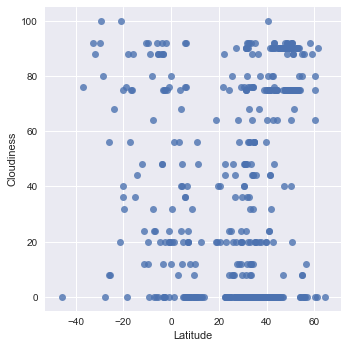

In [94]:
plt.show()

In [95]:
sns.lmplot(x= 'Latitude', y= 'WindSpeed', data=randomcity_df, fit_reg=False)
plt.savefig("Lat_Wind.png")

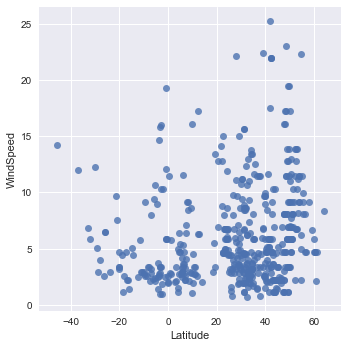

In [96]:
plt.show()

In [97]:
randomcity_df.to_csv("final_weather_data.csv", encoding="utf-8", index=False)